In [1]:
using LinearAlgebra, Distributions, Statistics, Plots, KernelFunctions, Random, Interpolations, ForwardDiff

In [2]:
k = with_lengthscale(Matern12Kernel(), 0.5)

Exponential Kernel (metric = Distances.Euclidean(0.0))
	- Scale Transform (s = 2.0)

In [30]:
d = 30
xs = range(0, stop=1, length=d)

0.0:0.034482758620689655:1.0

In [31]:
K = kernelmatrix(k, xs);

In [32]:
for (i,x) in enumerate(xs)
    for (j,y) in enumerate(xs)
        @assert K[i,j] ≈ exp(-abs(x-y)/0.5) "absolute diff = $(abs(K[i,j] - exp(-abs(x-y)/0.5)))"
    end
end

In [33]:
spectrum = eigen(K, sortby = (x -> -real(x)));

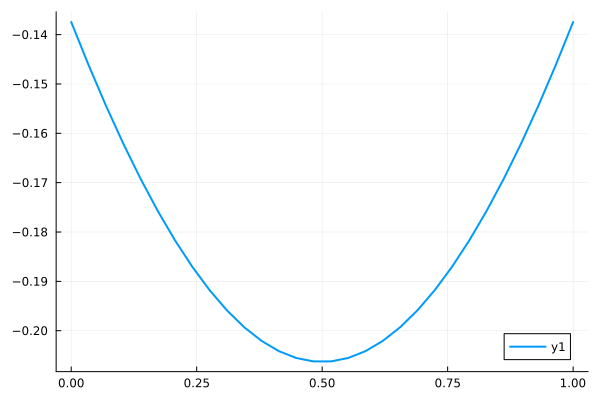

In [34]:
plot(xs,spectrum.vectors[:,1],lw=2)

In [35]:
Φ = √(d) * spectrum.vectors;

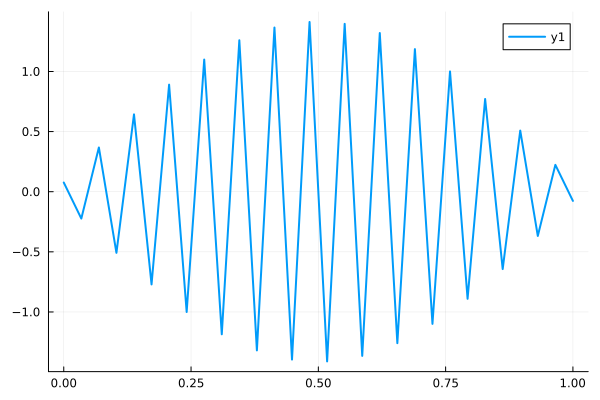

In [39]:
plot(xs, Φ[:,30],lw=2)

In [28]:
ϕ(x::Float64,i::Int) = linear_interpolation(xs, Φ[:,i])(x)

ϕ (generic function with 1 method)

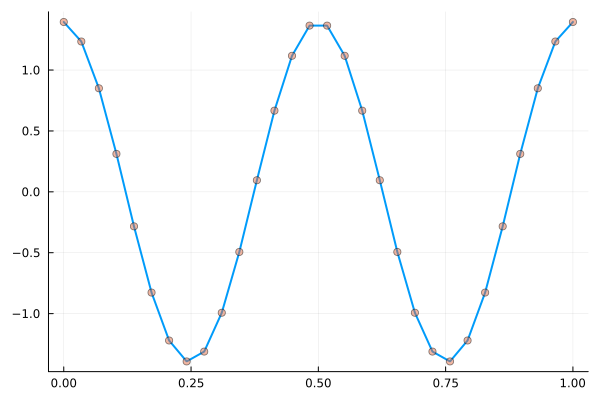

In [40]:
xs_fine = 0:0.001:1
i=5
plot(xs_fine, ϕ.(xs_fine,i),label="interpolated eigenfunction",lw=2,legend=false)
plot!(xs, Φ[:,i], label="discrete eigenfunction",seriestype=:scatter,ma=0.5)
# plot!(xs, Φ[:,i], label="discrete eigenfunction",ma=0.5)

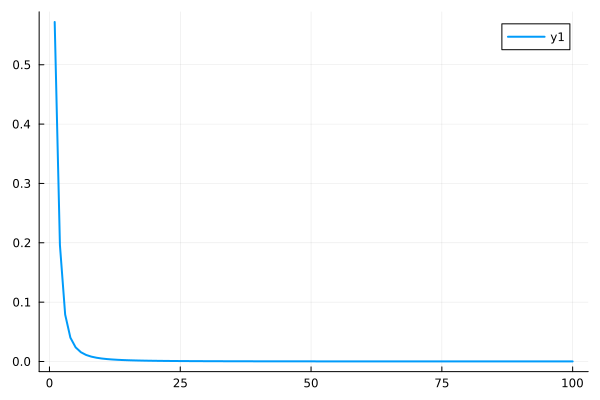

In [20]:
λ = spectrum.values / d
plot(λ,lw=2)